In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode(connected=True)
cf.set_config_file(offline=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
data = pd.read_csv('data/data_comercio_politics.csv', parse_dates=['date'])
df = data.loc[:, ['link_id', 'date', 'title', 'related_news', 'tags']]
print(df.shape)
df.head(2)

(4720, 5)


,link_id,date,title,related_news,tags
0,455689,2017-09-05,'Otra vez Andrés',NaN,otra-vez-andrés politica
1,455639,2017-09-05,'Fiscal José Domingo Pérez investigará a Keiko...,NaN,keiko-fujimori politica odebrecht


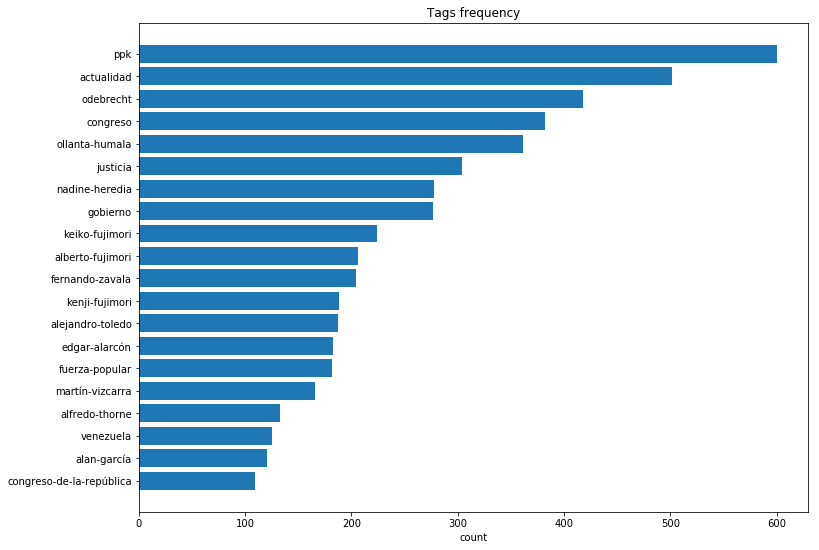

In [4]:
# plot tags
tags = [j for i in df.tags for j in i.split(' ')]
tags_unique, tags_count = zip(*sorted(Counter(tags).items(), key=lambda x: x[1]))
ind = np.arange(len(tags_unique))

ignore_top = 1
plot_lim = 20

fig, ax = plt.subplots(figsize=(12,9))
ax.barh(ind[:-ignore_top][-plot_lim:], tags_count[:-ignore_top][-plot_lim:])
ax.set_yticks(ind[:-ignore_top][-plot_lim:])
ax.set_yticklabels(tags_unique[:-ignore_top][-plot_lim:])
ax.set_title('Tags frequency')
ax.set_xlabel('count')
plt.show()

In [6]:
# Tags popularity by time
for tag in tags_unique:
    df['tag_'+tag] = df.tags.str.contains(tag, regex=False).astype(np.int32)
    
g = df.groupby('date').aggregate({i: 'sum' for i in ['tag_'+t for t in tags_unique]})

In [16]:
since = '2017-06-01'
ignore_top = 1
plot_lim = 5
plot_tags = tags_unique[:-ignore_top] if ignore_top > 0 else tags_unique
plot_tags = plot_tags[-plot_lim:][::-1]
g[g.index >= since].iplot(y=['tag_'+t for t in plot_tags],
                          title='Tags popularity by time',
                          legend={'orientation': 'h'})